# NO2 Trends in Lebanon

This notebook uses analyses the NO2 data in Lebanon and presents the insights from the analysis. Two datasets inform the analysis - NO2 dta obtained from Google Earth Engine and boundary files obtained from HDX. 

## Accessing the data

* [SharePoint](https://worldbankgroup.sharepoint.com.mcas.ms/teams/DevelopmentDataPartnershipCommunity-WBGroup/Shared%20Documents/Forms/AllItems.aspx?csf=1&web=1&e=Yvwh8r&cid=fccdf23e%2D94d5%2D48bf%2Db75d%2D0af291138bde&FolderCTID=0x012000CFAB9FF0F938A64EBB297E7E16BDFCFD&id=%2Fteams%2FDevelopmentDataPartnershipCommunity%2DWBGroup%2FShared%20Documents%2FProjects%2FData%20Lab%2FLebanon%20Economic%20Analytics%2FData%2Fair%5Fpollution%2FNO2&viewid=80cdadb3%2D8bb3%2D47ae%2D8b18%2Dc1dd89c373c5): The raw data queried from Google Earth Engine has been uploaded to SharePoint. 
* [Boundary Files](https://data.humdata.org/dataset/cod-ab-lbn?): The boundary files used to plot air pollution geospatially were obtained from HDX. 

## Insights

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import bokeh
from bokeh.layouts import column
from bokeh.models import Legend, Panel, Tabs

from bokeh.core.validation.warnings import EMPTY_LAYOUT, MISSING_RENDERERS

from bokeh.core.validation import silence

bokeh.core.validation.silence(EMPTY_LAYOUT, True)
bokeh.core.validation.silence(MISSING_RENDERERS, True)
from bokeh.plotting import figure, show, output_notebook, ColumnDataSource
from bokeh.io import output_notebook

In [2]:
# Use the silence function to ignore the EMPTY_LAYOUT warning
silence(EMPTY_LAYOUT, True)


def get_line_chart(
    dataframe,
    title,
    source,
    subtitle=None,
    measure="measure",
    category="category",
    color_code=None,
):
    # Initialize the figure
    p2 = figure(
        x_axis_type="datetime", width=1000, height=400, toolbar_location="above"
    )
    p2.add_layout(Legend(), "right")

    # Define the color palette (make sure this has enough colors for the categories)
    color_palette = [
        "#4E79A7",  # Blue
        "#F28E2B",  # Orange
        "#E15759",  # Red
        "#76B7B2",  # Teal
        "#59A14F",  # Green
        "#EDC948",  # Yellow
        "#B07AA1",  # Purple
        "#FF9DA7",  # Pink
        "#9C755F",  # Brown
        "#BAB0AC",  # Gray
        "#7C7C7C",  # Dark gray
        "#6B4C9A",  # Violet
        "#D55E00",  # Orange-red
        "#CC61B0",  # Magenta
        "#0072B2",  # Bright blue
        "#329262",  # Peacock green
        "#9E5B5A",  # Brick red
        "#636363",  # Medium gray
        "#CD9C00",  # Gold
        "#5D69B1",  # Medium blue
    ]

    # Loop through each unique category and plot a bar
    for id, unique_category in enumerate(dataframe[category].unique()):
        # Filter the DataFrame for each category
        category_df = dataframe[dataframe[category] == unique_category].copy()
        category_df.sort_values(
            by="date", inplace=True
        )  # Ensure the DataFrame is sorted by date
        category_source = ColumnDataSource(category_df)

        # Plot the bars
        p2.line(
            x="date",
            y=measure,
            source=category_source,
            color=color_palette[id],
            legend_label=unique_category,
        )

    # Configure legend
    p2.legend.click_policy = "hide"
    p2.legend.location = "top_right"

    # Set the subtitle as the title of the plot if it exists
    if subtitle:
        p2.title.text = subtitle

    # Create title and subtitle text using separate figures
    title_fig = figure(title=title, toolbar_location=None, width=800, height=40)
    title_fig.title.align = "left"
    title_fig.title.text_font_size = "12pt"
    title_fig.border_fill_alpha = 0
    title_fig.outline_line_color = None

    sub_title_fig = figure(title=source, toolbar_location=None, width=800, height=40)
    sub_title_fig.title.align = "left"
    sub_title_fig.title.text_font_size = "10pt"
    sub_title_fig.title.text_font_style = "normal"
    sub_title_fig.border_fill_alpha = 0
    sub_title_fig.outline_line_color = None

    # Combine the title, plot, and subtitle into a single layout
    layout = column(title_fig, p2, sub_title_fig)

    return layout

In [3]:
shapefile_path = (
    "../../data/shapefiles/lbn_adm_cdr_20200810/lbn_admbnda_adm2_cdr_20200810.shp"
)
lebanon_adm2 = gpd.read_file(shapefile_path)

In [4]:
monthly_no2_adm1 = pd.read_csv(
    "../../data/air_pollution/LBN_ADM1_Monthly_NO2_2019_2023_1.csv"
)
monthly_no2_adm2 = pd.read_csv(
    "../../data/air_pollution/LBN_ADM2_Monthly_NO2_2019_2023_1.csv"
)
monthly_no2_adm4 = pd.read_csv(
    "../../data/air_pollution/LBN_ADM4_Monthly_NO2_2019_2023_1.csv"
)

In [5]:
monthly_no2_adm1["date"] = monthly_no2_adm1["startMonth"].apply(
    lambda x: pd.to_datetime(x)
)
monthly_no2_adm2["date"] = monthly_no2_adm2["startMonth"].apply(
    lambda x: pd.to_datetime(x)
)
monthly_no2_adm4["date"] = monthly_no2_adm4["startMonth"].apply(
    lambda x: pd.to_datetime(x)
)

In [6]:
output_notebook()
bokeh.core.validation.silence(EMPTY_LAYOUT, True)
bokeh.core.validation.silence(MISSING_RENDERERS, True)

df = (
    monthly_no2_adm1.groupby(["admin1Name", "date"])
    .mean("NO2_column_number_density")
    .reset_index()
)

show(
    get_line_chart(
        df,
        category="admin1Name",
        title="Monthly Air Pollution in Lebanon by Admin 1",
        source="Copernicus",
        measure="NO2_column_number_density",
    )
)

Loading BokehJS ...

In [7]:
output_notebook()
bokeh.core.validation.silence(EMPTY_LAYOUT, True)
bokeh.core.validation.silence(MISSING_RENDERERS, True)

tabs = []

for adm in list(monthly_no2_adm2["admin1Name"].unique()):
    df = monthly_no2_adm2[monthly_no2_adm2["admin1Name"] == adm]

    tabs.append(
        Panel(
            child=get_line_chart(
                df,
                "Montly Air Pollution at Admin 2",
                "Source: Copernicus",
                category="admin2Name",
                measure="NO2_column_number_density",
            ),
            title=adm.capitalize(),
        )
    )

tabs = Tabs(tabs=tabs, sizing_mode="scale_both")
show(tabs, warn_on_missing_glyphs=False)

Loading BokehJS ...

In [8]:
monthly_no2_shp = lebanon_adm2.merge(monthly_no2_adm2, on=["admin1Name", "admin2Name"])

Text(0.5, 0.98, 'Average Monthly Air Pollution in Admin 2 regions')

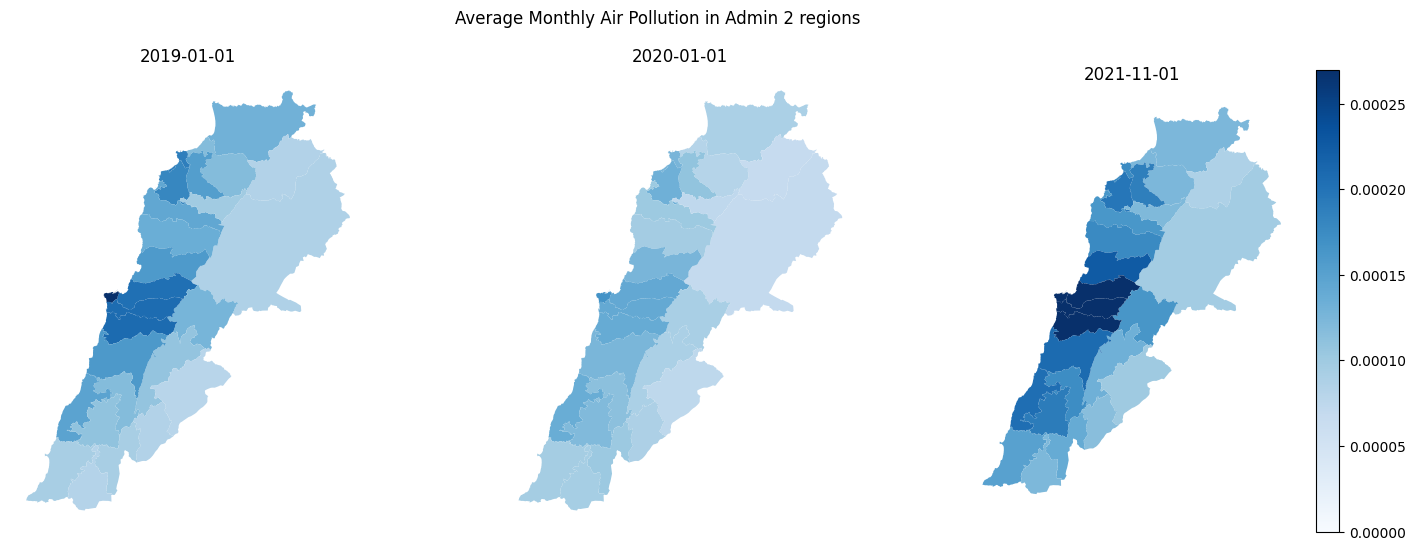

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

for id, date in enumerate(["2019-01-01", "2020-01-01", "2021-11-01"]):
    if id == 2:
        legend_bool = True
    else:
        legend_bool = False
    monthly_no2_shp[monthly_no2_shp["date_y"] == date].plot(
        column="NO2_column_number_density",
        legend=legend_bool,
        vmin=0,
        vmax=0.00027,
        ax=ax[id],
        cmap="Blues",
    )
    ax[id].axis("off")
    ax[id].set_title(date)

plt.suptitle("Average Monthly Air Pollution in Admin 2 regions")

Text(0.5, 0.98, 'Average Monthly Air Pollution in Admin 2 regions')

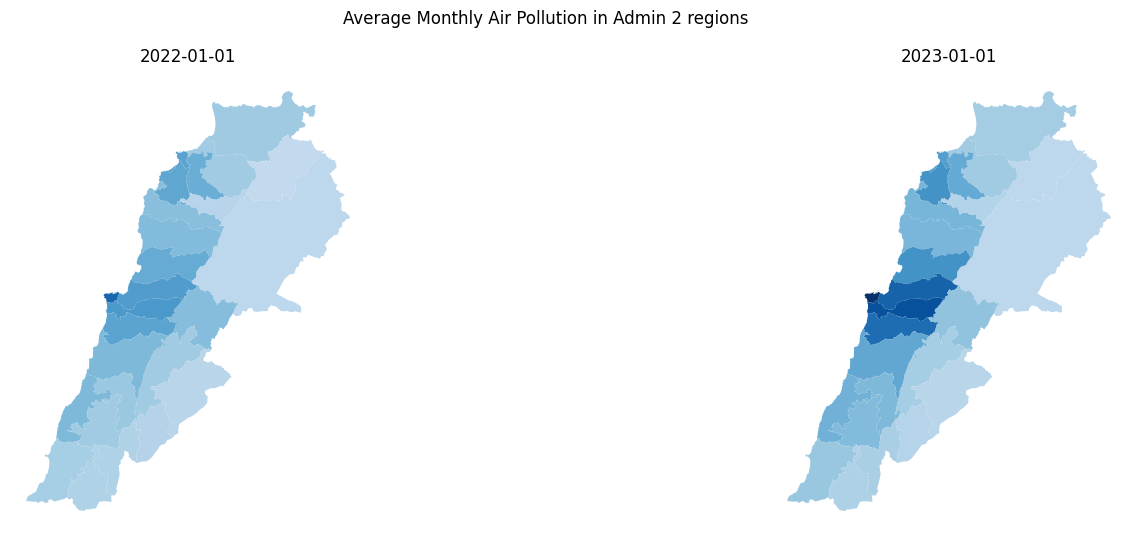

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

for id, date in enumerate(["2022-01-01", "2023-01-01"]):
    if id == 2:
        legend_bool = True
    else:
        legend_bool = False
    monthly_no2_shp[monthly_no2_shp["date_y"] == date].plot(
        column="NO2_column_number_density",
        legend=legend_bool,
        vmin=0,
        vmax=0.00027,
        ax=ax[id],
        cmap="Blues",
    )
    ax[id].axis("off")
    ax[id].set_title(date)

plt.suptitle("Average Monthly Air Pollution in Admin 2 regions")

### Observations 
- 2021 was worse than the two years before and after for NO2 levels in Lebanon. 
- Beirut is the most polluted region

In [11]:
beirut = gpd.read_file(
    "../../data/shapefiles/lbn_beirut_adm4_mapaction_pcoded/lbn_beirut_adm4_MapAction_Pcoded.shp"
)

In [12]:
monthly_no2_adm4 = beirut.merge(monthly_no2_adm4, on=["Quarter", "Sector"])

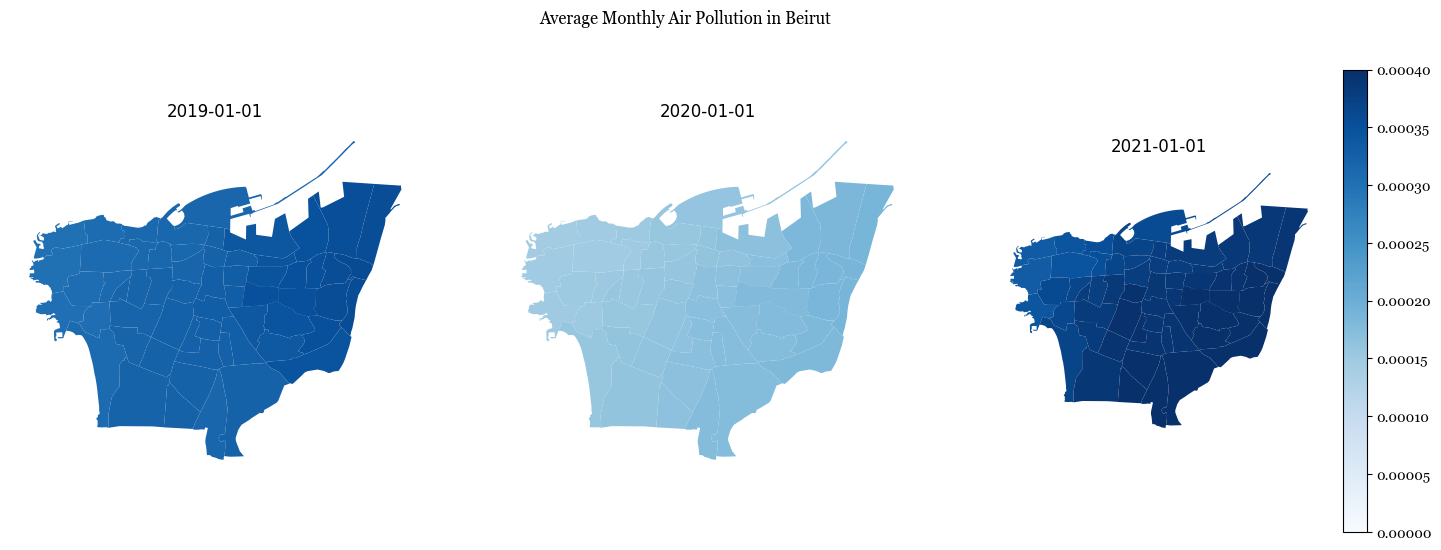

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
plt.rcParams["font.family"] = "georgia"

for id, date in enumerate(["2019-01-01", "2020-01-01", "2021-01-01"]):
    if id == 2:
        legend_bool = True
    else:
        legend_bool = False
    monthly_no2_adm4[monthly_no2_adm4["date"] == date].plot(
        column="NO2_column_number_density",
        legend=legend_bool,
        ax=ax[id],
        vmin=0,
        vmax=0.00040,
        cmap="Blues",
    )
    ax[id].axis("off")
    ax[id].set_title(date)

plt.suptitle("Average Monthly Air Pollution in Beirut");

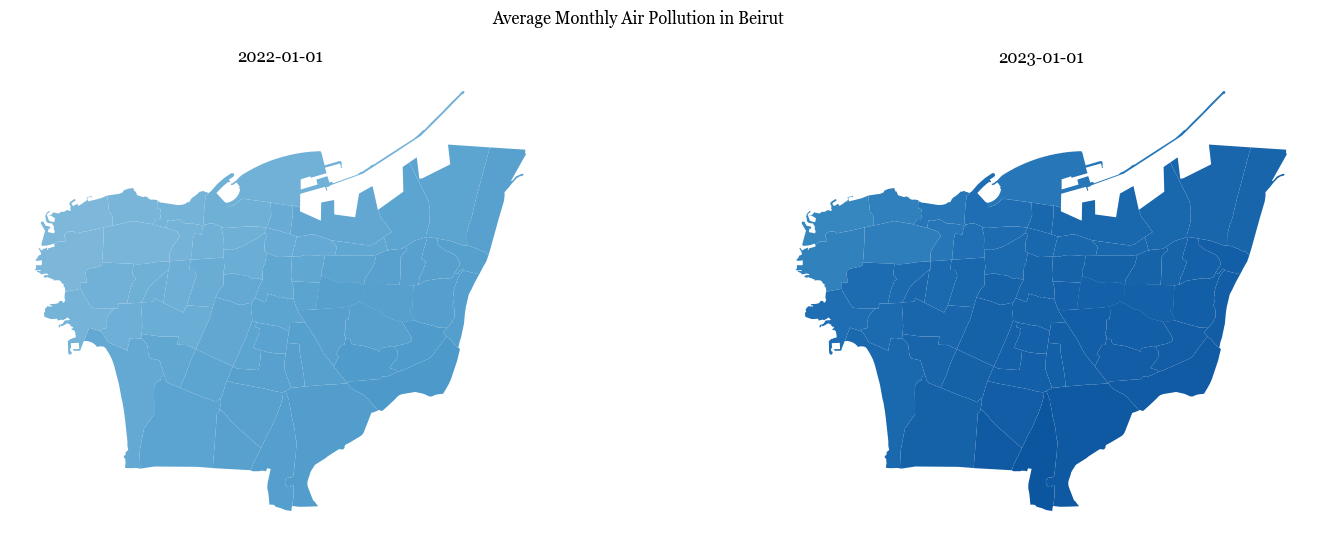

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
plt.rcParams["font.family"] = "georgia"

for id, date in enumerate(["2022-01-01", "2023-01-01"]):
    if id == 2:
        legend_bool = True
    else:
        legend_bool = False
    monthly_no2_adm4[monthly_no2_adm4["date"] == date].plot(
        column="NO2_column_number_density",
        legend=legend_bool,
        ax=ax[id],
        vmin=0,
        vmax=0.00040,
        cmap="Blues",
    )
    ax[id].axis("off")
    ax[id].set_title(date)

plt.suptitle("Average Monthly Air Pollution in Beirut");